In [8]:
import cv2
from matplotlib import pyplot
import numpy

# Ustawienie rozmarów wyświetlanych obrazów
pyplot.rcParams["figure.figsize"] = (18, 10)

In [9]:
#
# Wczytanie obrazów źródłowych
#
# źródło grafiki colors.jpg: https://unsplash.com/photos/gT5kuls6Y6Q
# źródło grafiki gacław-na-kuchni.jpg: własne
#
image_from_file = cv2.imread('images/colors.jpg')
#image_from_file = cv2.imread('images/gacław-na-kuchni.jpg')
image_gray = cv2.cvtColor(image_from_file, cv2.COLOR_BGR2GRAY)
image_color = cv2.cvtColor(image_from_file, cv2.COLOR_BGR2RGB)
print('Rozmiar obrazka: ', image_from_file.shape)

Rozmiar obrazka:  (750, 1000, 3)


# Zadanie 1

750 1000


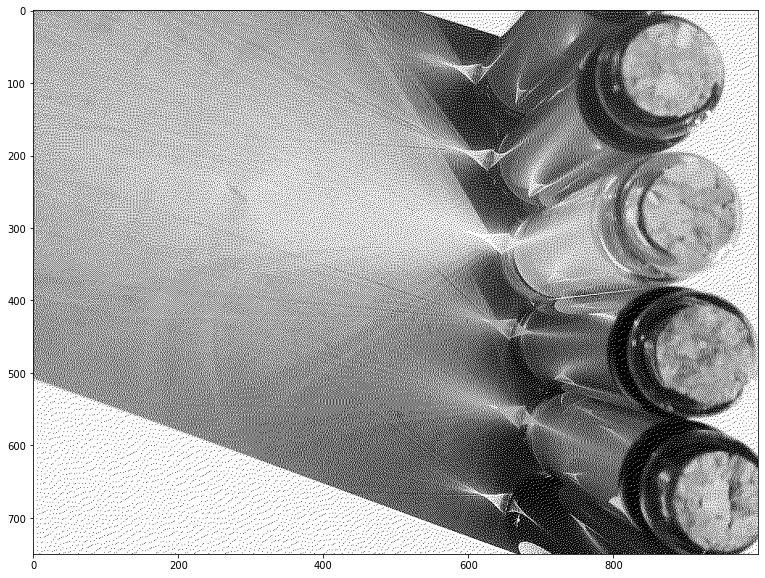

In [10]:
output = numpy.copy(image_gray)
output = output.astype(int)

def find_closest_palette_color(old_pixel):
    return round(old_pixel/ 255 ) * 255
print(output.shape[0]   , output.shape[1])

#
# Algorytm
#
for y in range(output.shape[0]):
    for x in range(output.shape[1]):
        old_pixel = output[y][x]
        new_pixel = find_closest_palette_color(old_pixel)
        output[y][x] = new_pixel
        quant_error = old_pixel - new_pixel
        if x+ 1 < output.shape[1]:
            output[y    ][x + 1] = output[y    ][x + 1] + quant_error * 7/16
        if y+ 1 < output.shape[0] and x-1 > 0 :
            output[y + 1][x - 1] = output[y + 1][x - 1] + quant_error * 3/16
        if y+ 1 < output.shape[0]:
            output[y + 1][x    ] = output[y + 1 ][x ] + quant_error * 5/16
        if x+ 1 < output.shape[1] and  y + 1 < output.shape[0]:
            output[y + 1][x + 1] = output[y + 1][x + 1] + quant_error * 1/16
        #zgodnie z prezka przeksztlacmy liczby do zasiegu 0 - 255
numpy.clip(output, 0, 255)
        #formatujemy do uint8
output = output.astype(dtype=numpy.uint8)
#
# Wyświetlenie
#
pyplot.imshow(output, cmap='gray')

Text(0, 0.5, 'Liczba pikseli obrazu []')

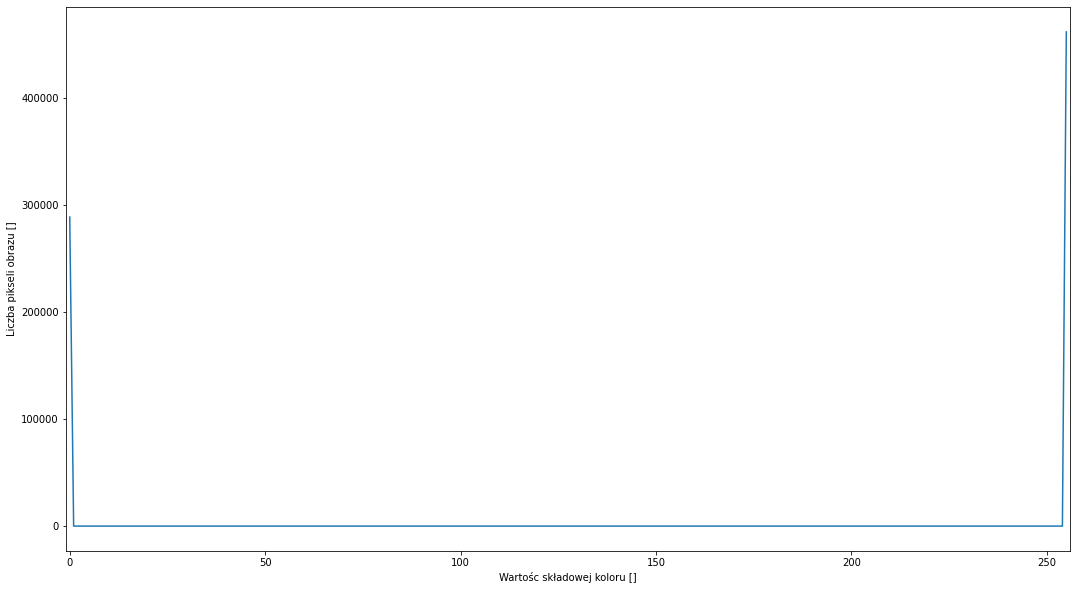

In [11]:
#
# Histogram
#
histr = cv2.calcHist([output], [0], None, [256], [0, 256])
pyplot.plot(histr)
pyplot.xlim([-1, 256])
pyplot.xlabel('Wartośc składowej koloru []')
pyplot.ylabel('Liczba pikseli obrazu []')

# Zadanie 2

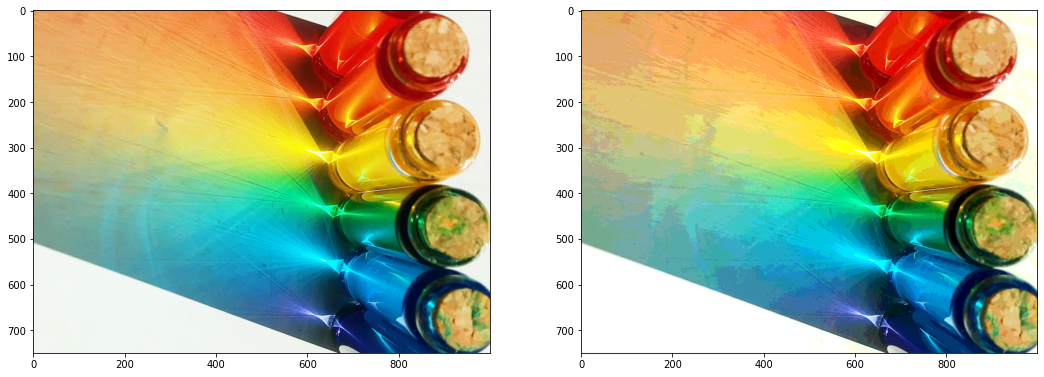

In [18]:
output = numpy.copy(image_color)
output = output.astype(dtype=int)
reduced = numpy.copy(image_color)
K = 2
tones = 2
def find_closest_palette_color(old_pixel, k=5):
    to_return = [0, 0, 0]
    to_return[0] = round(   (k - 1)*old_pixel[0]/ 255 ) * 255 / (k-1) 
    to_return[1] = round(   (k - 1)*old_pixel[1]/ 255 ) * 255 / (k-1)
    to_return[2] = round(   (k - 1)*old_pixel[2]/ 255 ) * 255 / (k-1)
    return to_return

#
# Algorytm
#
for y in range(output.shape[0]-1):
    for x in range(output.shape[1]-1):
        # old_pixel = output[y][x]
        # new_pixel = find_closest_palette_color(old_pixel, K)
        # output[y][x] = new_pixel
        # quant_error = old_pixel - new_pixel           
        # output[y    ][x + 1] = output[y    ][x + 1] + quant_error * 7/16
        # output[y + 1][x - 1] = output[y + 1][x - 1] + quant_error * 3/16
        # output[y + 1][x    ] = output[y + 1 ][x   ] + quant_error * 5/16
        # output[y + 1][x + 1] = output[y + 1][x + 1] + quant_error * 1/16


        oldpixel = [output[y][x][0], output[y][x][1], output[y][x][2]]
        newpixel = [0, 0, 0]
        newpixel = find_closest_palette_color(oldpixel, 10) 
        reduced[y][x] = find_closest_palette_color(reduced[y][x], 10)
        output[y][x] = newpixel
        for i in range(3):
            quant_error = oldpixel[i] - newpixel[i]
            output[y][x + 1][i] = output[y][x + 1][i] + quant_error * 7 / 16
            output[y + 1][x - 1][i] = output[y + 1][x - 1][i] + quant_error * 3 / 16
            output[y + 1][x][i] = output[y + 1][x][i] + quant_error * 5 / 16
            output[y + 1][x + 1][i] = output[y + 1][x + 1][i] + quant_error * 1 / 16
 #zgodnie z prezka przeksztlacmy liczby do zasiegu 0 - 255
numpy.clip(output, 0, 255)
        #formatujemy do uint8
output = output.astype(dtype=numpy.uint8)
#
# Wyświetlenie
#
fig, ax = pyplot.subplots(1, 2)
ax[0].imshow(output)
ax[1].imshow(reduced)

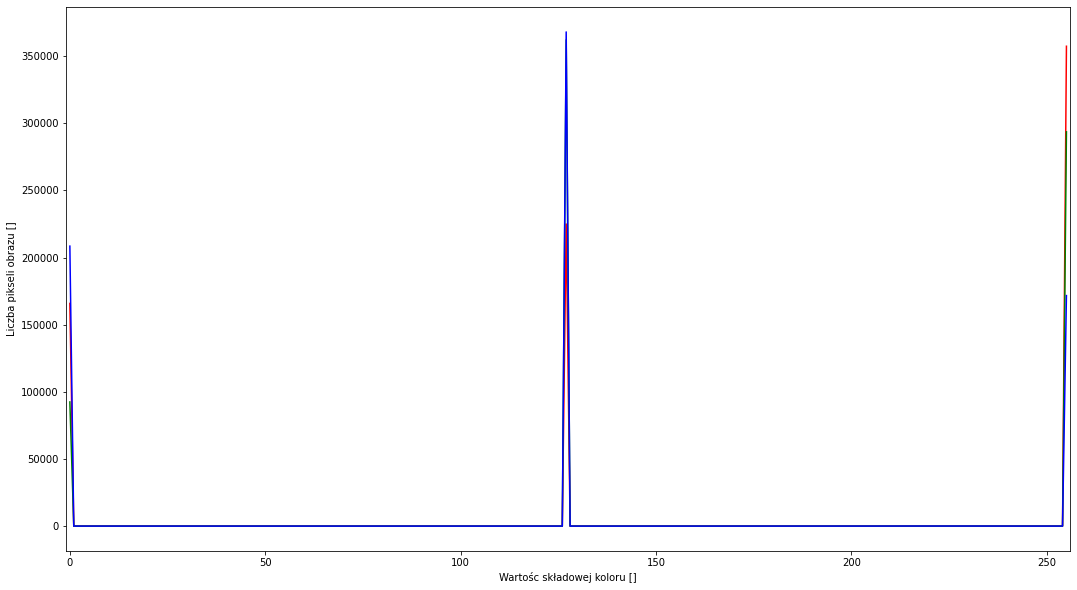

In [17]:
#
# Histogram
#
color = ('r', 'g', 'b')

for i, col in enumerate(color):
    histr = cv2.calcHist([output], [i], None, [256], [0, 256])
    pyplot.plot(histr, color=col)
    pyplot.xlim([-1, 256])
    pyplot.xlabel('Wartośc składowej koloru []')
    pyplot.ylabel('Liczba pikseli obrazu []')

# Zadanie 3

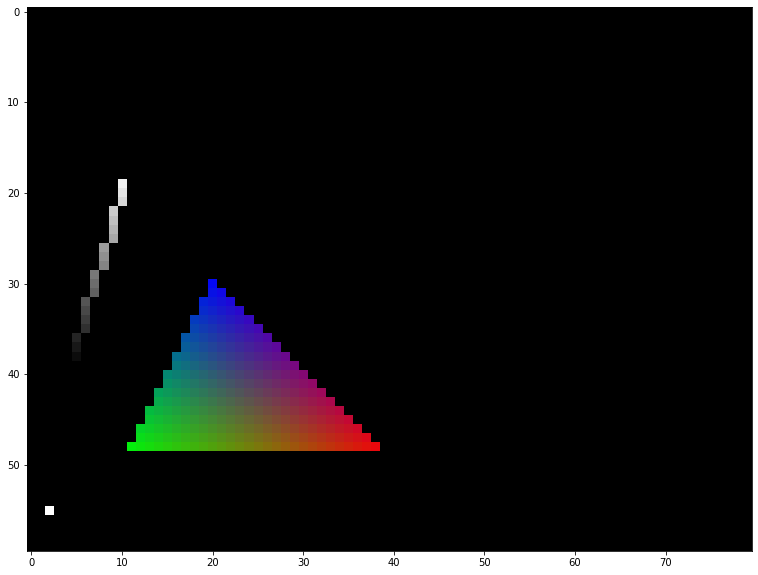

In [14]:
import math
#
# Przygotowanie płótna
#
width = 80
height = 60
image = numpy.zeros((height, width, 3), dtype=numpy.uint8)

sign = lambda x: 0 if x == 0 else math.copysign(1, x)
#
# Funkcja rysująca punkt
#
# NOTE(sdatko): punkt 0,0 to lewy dolny róg obrazu
#
def draw_point(image, x, y, color=(255, 255, 255)):
    image[image.shape[0] - 1 - y, x] = color

# funkcja do wyznaczania pola
def get_area(a, b, c):
    return (c[0] - a[0] ) * (b[1] - a[1]) - (c[1] - a[1]) *  (b[0] - a[0]) 


#
# Funkcja rysująca linię
#
def draw_line(image, x1, y1, x2, y2, col1 = (0, 0, 0), col2 = (255, 255, 255)):
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    col1 = numpy.asarray(col1)
    col2 = numpy.asarray(col2)
    Xi = 0 if dx == 0 else (x2-x1)/dx 
    Yi = 0 if dy == 0 else (y2-y1)/dy 
    d = 0 
    if dx > dy:
        d = 2 * dy - dx
        diff = (col2 - col1) // dx
    else:
        d = 2 * dx - dy
        diff = (col2 - col1) // dy
    x0, y0 = x1, y1
    C = col1
    draw_point(image, x0, y0, col1)

    while x0 != x2 or y0 != y2:
        C = numpy.clip(C+diff, 0, 255)
        if dx > dy:
            x0+=Xi
            d+= 2* dy
            if d >= 0:
                y0+=Yi
                d -= 2 * dx
        else :
            y0+=Yi
            d+= 2*dx
            if d>=0:
                x0+=Xi
                d-= 2* dy        
        draw_point(image, int(x0), int(y0), C )


#
# Funkcja rysująca trójkąt
#
def draw_triangle(image, a, b, c, col1 = [255, 0, 0], col2 = [0, 255, 0], col3 = [0, 0, 255]):

    col1= numpy.asarray(col1)
    col2= numpy.asarray(col2)
    col3= numpy.asarray(col3)

    x_min = min(a[0], b[0], c[0])
    y_min = min(a[1], b[1], c[1])

    x_max = max(a[0], b[0], c[0])
    y_max = max(a[1], b[1], c[1])
    

    for x in range(x_min, x_max):
        for y in range(y_min, y_max):
            point = (x, y)

            p1 = get_area(a, b, point)
            p2 = get_area(b, c, point)
            p3 = get_area(c, a, point)
            l = get_area(a, b, c)
            Cp = p1/l * col1 + p2/l * col2 + p3/l * col3

            if sign(p1) == sign(p2) and sign(p2) == sign(p3) and sign(p1) == sign(p3) :
                draw_point(image, x, y, Cp)


#
# Rysowanie
#
draw_point(image, 2, 4)
draw_line(image, 4, 20, 10, 40)
draw_triangle(image, (10, 10), (20, 30), (40, 10) )
#
# Wyświetlenie
#
pyplot.imshow(image)

# Zadanie 4

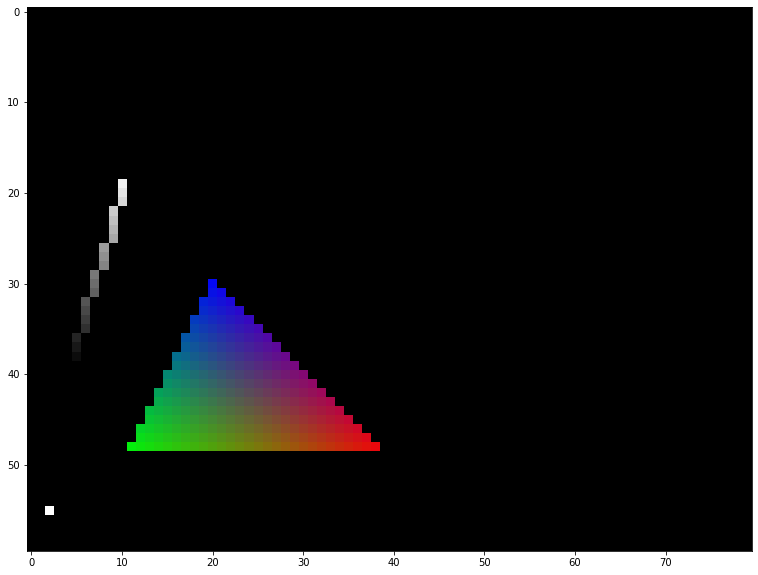

In [15]:
#
# Przygotowanie płótna
#
width = 80
height = 60
image = numpy.zeros((height, width, 3), dtype=numpy.uint8)


#
# Funkcja rysująca punkt
#
# NOTE(sdatko): punkt 0,0 to lewy dolny róg obrazu
#
def draw_point(image, x, y, color=(255, 255, 255)):
    image[image.shape[0] - 1 - y, x, :] = color


#
# Funkcja rysująca linię
#
def draw_line(image, x1, y1, x2, y2, col1 = (0, 0, 0), col2 = (255, 255, 255)):
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    col1 = numpy.asarray(col1)
    col2 = numpy.asarray(col2)
    Xi = 0 if dx == 0 else (x2-x1)/dx 
    Yi = 0 if dy == 0 else (y2-y1)/dy 
    d = 0 
    if dx > dy:
        d = 2 * dy - dx
        diff = (col2 - col1) // dx
    else:
        d = 2 * dx - dy
        diff = (col2 - col1) // dy
    x0, y0 = x1, y1
    C = col1
    draw_point(image, x0, y0, col1)

    while x0 != x2 or y0 != y2:
        C = numpy.clip(C+diff, 0, 255)
        if dx > dy:
            x0+=Xi
            d+= 2* dy
            if d >= 0:
                y0+=Yi
                d -= 2 * dx
        else :
            y0+=Yi
            d+= 2*dx
            if d>=0:
                x0+=Xi
                d-= 2* dy        
        draw_point(image, int(x0), int(y0), C )


#
# Funkcja rysująca trójkąt
#
def draw_triangle(image, a, b, c, col1 = [255, 0, 0], col2 = [0, 255, 0], col3 = [0, 0, 255]):

    col1= numpy.asarray(col1)
    col2= numpy.asarray(col2)
    col3= numpy.asarray(col3)

    x_min = min(a[0], b[0], c[0])
    y_min = min(a[1], b[1], c[1])

    x_max = max(a[0], b[0], c[0])
    y_max = max(a[1], b[1], c[1])
    

    for x in range(x_min, x_max):
        for y in range(y_min, y_max):
            point = (x, y)

            p1 = get_area(a, b, point)
            p2 = get_area(b, c, point)
            p3 = get_area(c, a, point)
            l = get_area(a, b, c)
            Cp = p1/l * col1 + p2/l * col2 + p3/l * col3

            if sign(p1) == sign(p2) and sign(p2) == sign(p3) and sign(p1) == sign(p3) :
                draw_point(image, x, y, Cp)


#
# Rysowanie
#
draw_point(image, 2, 4)
draw_line(image, 4, 20, 10, 40)
draw_triangle(image, (10, 10), (20, 30), (40, 10) )

#
# Wyświetlenie
#
pyplot.imshow(image)

# Zadanie 5

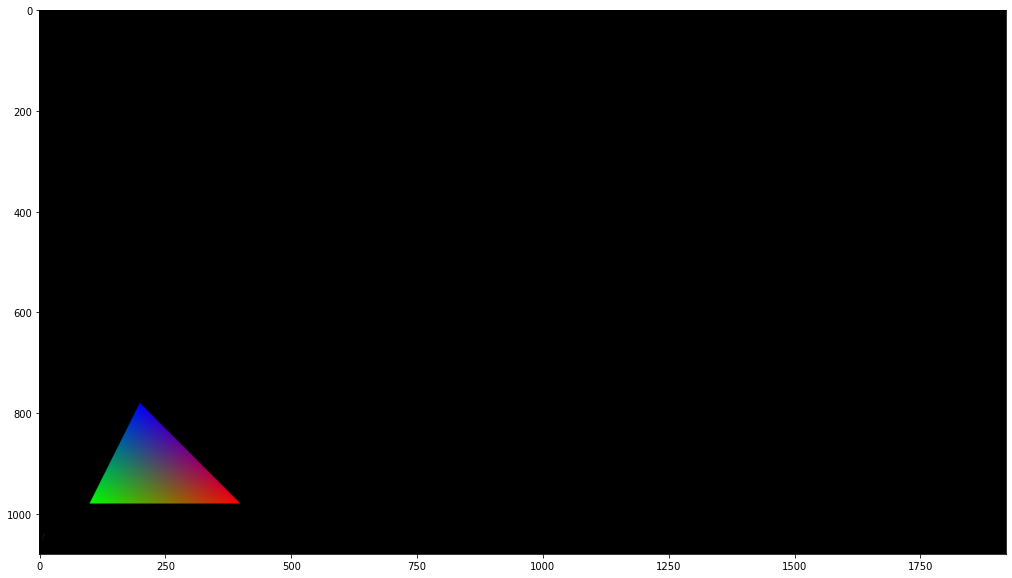

In [20]:
#
# Przygotowanie płótna
#
width = 1920
height = 1080
scale  = 4
image = numpy.zeros((height, width, 3), dtype=numpy.uint8)
image_scaled = numpy.zeros((height*scale, width*scale, 3), dtype=numpy.uint8)

#
# Funkcja rysująca punkt
#
# NOTE(sdatko): punkt 0,0 to lewy dolny róg obrazu
#
def draw_point(image, x, y, color=(255, 255, 255)):
    image[image.shape[0] - 1 - y, x, :] = color


#
# Funkcja rysująca linię
#
def draw_line(image, x1, y1, x2, y2, col1 = (0, 0, 0), col2 = (255, 255, 255)):
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    col1 = numpy.asarray(col1)
    col2 = numpy.asarray(col2)
    Xi = 0 if dx == 0 else (x2-x1)/dx 
    Yi = 0 if dy == 0 else (y2-y1)/dy 
    d = 0 
    if dx > dy:
        d = 2 * dy - dx
        diff = (col2 - col1) // dx
    else:
        d = 2 * dx - dy
        diff = (col2 - col1) // dy
    x0, y0 = x1, y1
    C = col1
    draw_point(image, x0, y0, col1)

    while x0 != x2 or y0 != y2:
        C = numpy.clip(C+diff, 0, 255)
        if dx > dy:
            x0+=Xi
            d+= 2* dy
            if d >= 0:
                y0+=Yi
                d -= 2 * dx
        else :
            y0+=Yi
            d+= 2*dx
            if d>=0:
                x0+=Xi
                d-= 2* dy        
        draw_point(image, int(x0), int(y0), C )


#
# Funkcja rysująca trójkąt
#
def draw_triangle(image, a, b, c, col1 = [255, 0, 0], col2 = [0, 255, 0], col3 = [0, 0, 255]):
    
    col1= numpy.asarray(col1)
    col2= numpy.asarray(col2)
    col3= numpy.asarray(col3)

    x_min = min(a[0], b[0], c[0])
    y_min = min(a[1], b[1], c[1])

    x_max = max(a[0], b[0], c[0])
    y_max = max(a[1], b[1], c[1])
    

    for x in range(x_min, x_max):
        for y in range(y_min, y_max):
            point = (x, y)

            p1 = get_area(a, b, point)
            p2 = get_area(b, c, point)
            p3 = get_area(c, a, point)
            l = get_area(a, b, c)
            Cp = p1/l * col1 + p2/l * col2 + p3/l * col3

            if sign(p1) == sign(p2) and sign(p2) == sign(p3) and sign(p1) == sign(p3) :
                draw_point(image, x, y, Cp)


#
# Rysowanie
#

draw_point(image_scaled, 2*scale, 4*scale)
draw_line(image_scaled, 4*scale, 20*scale, 10*scale, 40*scale)
draw_triangle(image_scaled, (100*scale, 100*scale), (200*scale, 300*scale), (400*scale, 100*scale) )

"""
  to robimy skalowansko
"""
for y in range(height):
    for x in range(width):
        sx = x * scale
        sy = y * scale
        
        scolor = [0, 0, 0]
        for i in range(scale):
            for j in range(scale):
                scolor[0] += image_scaled[sy +i, sx+ j, 0]
                scolor[1] += image_scaled[sy +i, sx+ j, 1]
                scolor[2] += image_scaled[sy +i, sx+ j, 2]
        scolor[0] /= scale**2
        scolor[1] /= scale**2
        scolor[2] /= scale**2
        image[y, x] = scolor 

#
# Wyświetlenie
#
pyplot.imshow(image)